In [1]:
from datasets import load_dataset
import numpy as np
import pandas as pd
from GHSOM import GHSOM
from help_functions import *

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import GermanStemmer
import nltk

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

C:\tom\moje\ViT-GHSOM\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds = load_dataset("lschoen/10kgnad")

In [3]:
df = pd.concat([ds['train'].to_pandas(), ds['test'].to_pandas()], axis=0)
df.drop(['label'], axis=1, inplace=True)
y = df['category']
label_names = np.unique(y)
label_mapping = {name: i for i, name in enumerate(label_names)}
y_int = y.map(label_mapping).to_numpy()
X = df.drop(['category'], axis=1).to_numpy()

In [4]:
stemmer = GermanStemmer()

def german_tokenizer(text):  
    tokens = nltk.word_tokenize(text, language='german')
    stems = [stemmer.stem(t) for t in tokens if t.isalpha()]
    return stems

tfidf_vectorizer = TfidfVectorizer(
    tokenizer=german_tokenizer,
    max_df=0.07,  
    min_df=0.0056, 
    norm='l2' 
)

In [5]:
X_sparse = tfidf_vectorizer.fit_transform(X.ravel())
X_tfidf = X_sparse.toarray()

C:\tom\moje\ViT-GHSOM\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:526: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [6]:
ghsom_deep = GHSOM(
    input_dim=X_tfidf.shape[1],
    t1=0.07,
    t2=0.0035,
    training_epoch_num=15,
    learning_rate=0.5,
    beta=0.999,
    use_qe_for_vertical=True,
    min_samples_vertical_grow=None,
    max_gsom_size=None,
    distance_k=2,
    neighbourhood_function='gaussian',
    decay_type='exponential'
)

In [7]:
ghsom_deep.train(X_tfidf)

Layer 0 Initialized, Global stopping criterion (tau2 * (qe0 or mqe0)): 35.6545
   -> Spawning child 1_0-0 Num of samples: 173, Error: 181.52 > 35.65)
   -> Spawning child 1_0-1 Num of samples: 92, Error: 94.72 > 35.65)
   -> Spawning child 1_0-2 Num of samples: 1189, Error: 1252.58 > 35.65)
   -> Spawning child 1_0-3 Num of samples: 1071, Error: 1125.61 > 35.65)
   -> Spawning child 1_0-5 Num of samples: 73, Error: 75.53 > 35.65)
   -> Spawning child 1_0-6 Num of samples: 90, Error: 94.12 > 35.65)
   -> Spawning child 1_0-7 Num of samples: 700, Error: 727.62 > 35.65)
   -> Spawning child 1_0-8 Num of samples: 370, Error: 387.60 > 35.65)
   -> Spawning child 1_1-1 Num of samples: 50, Error: 51.98 > 35.65)
   -> Spawning child 1_1-3 Num of samples: 112, Error: 113.88 > 35.65)
   -> Spawning child 1_1-5 Num of samples: 5738, Error: 6056.98 > 35.65)
   -> Spawning child 1_1-7 Num of samples: 503, Error: 525.87 > 35.65)
   -> Spawning child 1_1-8 Num of samples: 88, Error: 80.25 > 35.65)
  

In [9]:
ghsom_deep.calculate_global_qe(X_tfidf)

np.float64(0.9562507723769944)

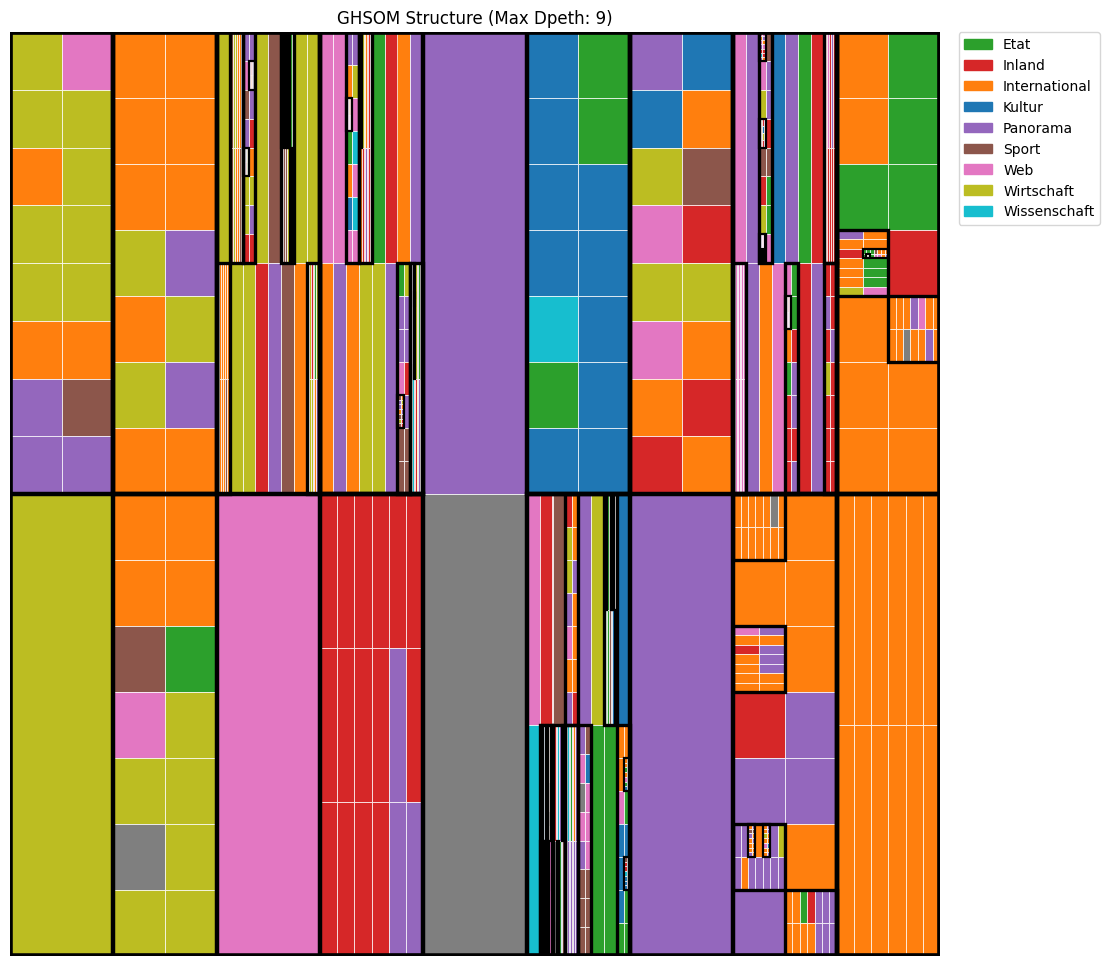

In [10]:
plot_ghsom(ghsom_deep, X_tfidf, y_int, label_names)

In [6]:
ghsom_shallow = GHSOM(
    input_dim=X_tfidf.shape[1],
    t1=0.035,
    t2=0.0035,
    training_epoch_num=15,
    learning_rate=0.5,
    beta=0.999,
    use_qe_for_vertical=False,
    min_samples_vertical_grow=None,
    max_gsom_size=None,
    distance_k=2,
    neighbourhood_function='gaussian',
    decay_type='exponential'
)

In [7]:
ghsom_shallow.train(X_tfidf)

Layer 0 Initialized, Global stopping criterion (tau2 * (qe0 or mqe0)): 0.0035
Novy shape 3, 2
Novy shape 4, 2
Novy shape 5, 2
Novy shape 6, 2
Novy shape 7, 2
Novy shape 8, 2
Novy shape 9, 2


KeyboardInterrupt: 

In [13]:
ghsom_shallow.gsom_db.keys()

dict_keys([])

In [ ]:
ghsom_shallow.calculate_global_qe(X_tfidf)


In [ ]:
plot_ghsom(ghsom_shallow, X_tfidf, y_int, label_names)